<a href="https://colab.research.google.com/github/amirgarsha/ML_course_maktab/blob/main/Mini_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler  


In [3]:
from sklearn.cluster import KMeans

## Load and Prepare Data

In [4]:
df_customer = pd.read_csv("Mall_Customers.csv")
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [5]:
print(df_customer.columns.values)
print(df_customer.shape)

['CustomerID' 'Gender' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']
(200, 5)


In [6]:
df_customer.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

In [9]:
##finding null value
print(df_customer.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [10]:
##change categorical value
df_customer_prc = df_customer.replace(['Male','Female'],[0,1])
df_customer_prc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [11]:
## standardization
sc = StandardScaler()
df_customer_prc[["Age","Annual Income (k$)","Spending Score (1-100)"]] = sc.fit_transform(df_customer_prc[["Age","Annual Income (k$)","Spending Score (1-100)"]])
df_customer_prc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,-1.424569,-1.738999,-0.434801
1,2,0,-1.281035,-1.738999,1.195704
2,3,1,-1.352802,-1.700830,-1.715913
3,4,1,-1.137502,-1.700830,1.040418
4,5,1,-0.563369,-1.662660,-0.395980


## Strorytelling - Visualization

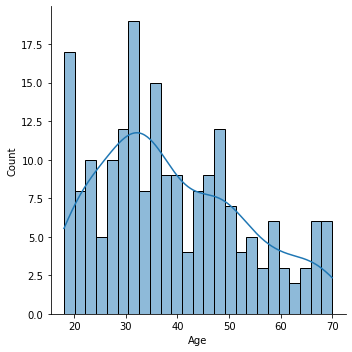

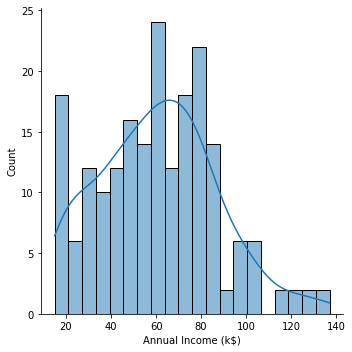

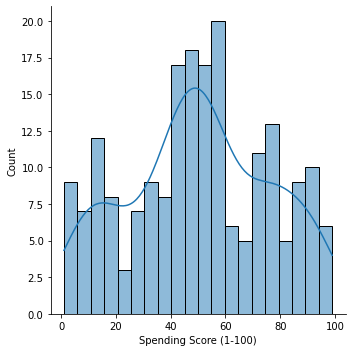

In [12]:
sns.displot(df_customer["Age"],kde=True,bins=25)

sns.displot(df_customer["Annual Income (k$)"],kde=True,bins=20)

sns.displot(df_customer["Spending Score (1-100)"],kde=True,bins=20)

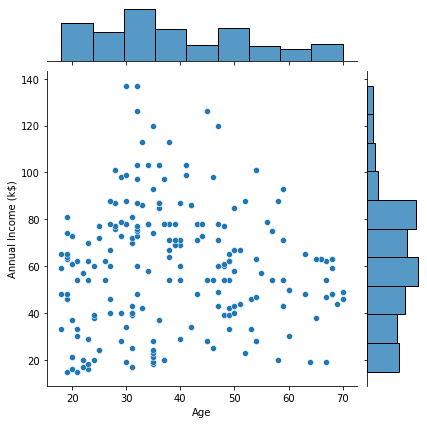

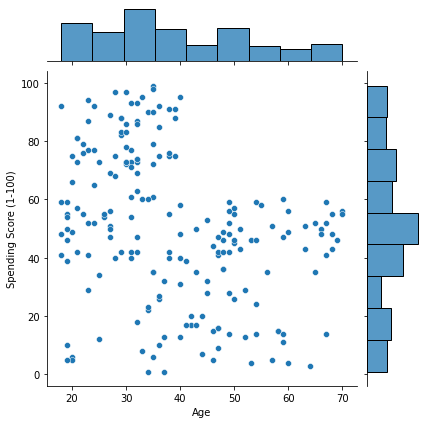

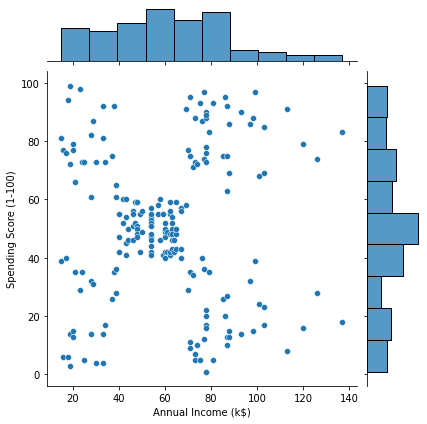

In [13]:
sns.jointplot(x='Age', y='Annual Income (k$)', data=df_customer)
sns.jointplot(x='Age', y='Spending Score (1-100)', data=df_customer)
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_customer)

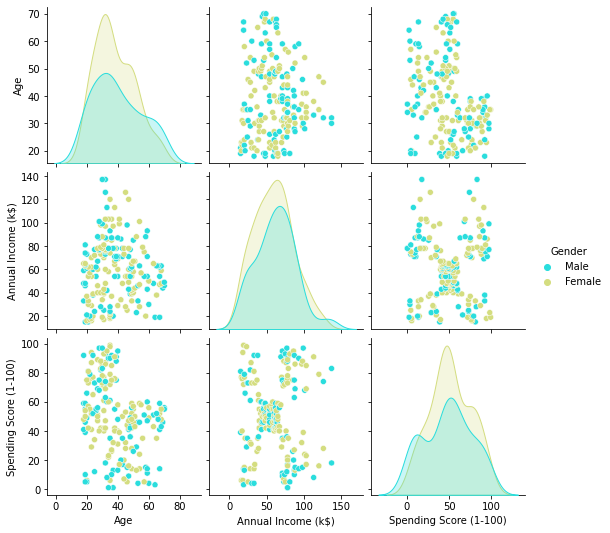

In [14]:
sns.pairplot(df_customer[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]], hue='Gender',palette='rainbow')

## Trani the Model (Clustering)

In [15]:
## Kmeans
## finding best k with elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_customer_prc)
    distortions.append(kmeanModel.inertia_)

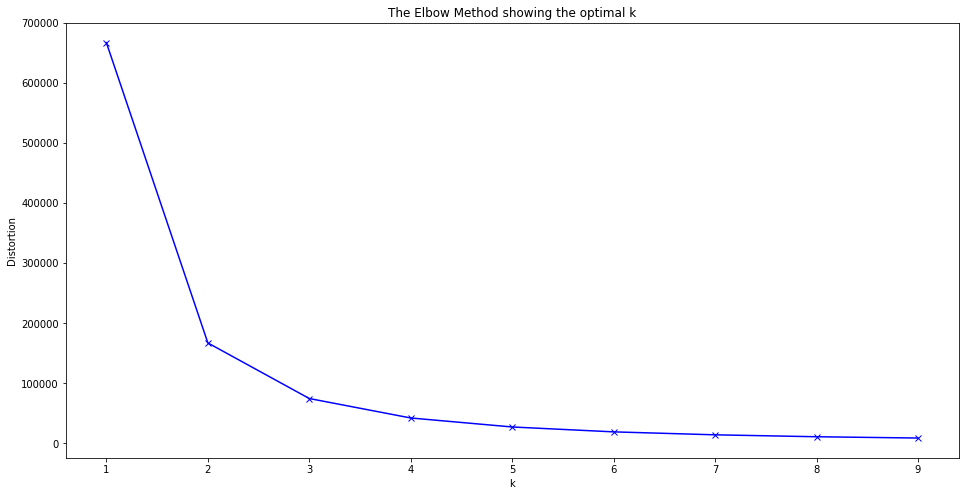

In [16]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df_customer_prc)

KMeans(n_clusters=2)

In [30]:
df_customer_prc['k_means']=kmeanModel.predict(df_customer_prc)

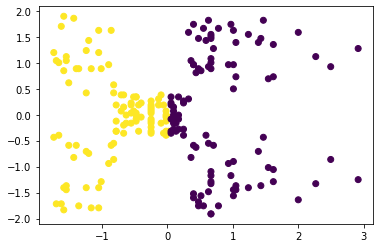

In [31]:
plt.scatter(df_customer_prc['Annual Income (k$)'], df_customer_prc['Spending Score (1-100)'], c=kmeanModel.labels_)
plt.show()

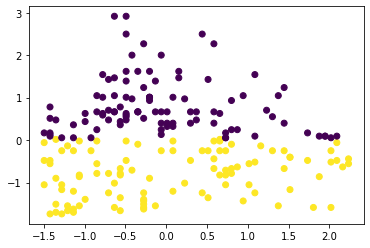

In [32]:
plt.scatter(df_customer_prc['Age'], df_customer_prc['Annual Income (k$)'], c=kmeanModel.labels_)
plt.show()

## Send us the Result (Maktabkhoone)